### Overall data using Jen$ method 

In [4]:
import scraping_class
logfile = 'log.txt' 
connector = scraping_class.Connector(logfile)
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from urllib.parse import unquote, quote
import pandas as pd
import numpy as np
import html5lib
import sys
import pickle
from tqdm import tqdm_notebook
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [6]:
with open('df_final_JacobLeg.pkl', 'rb') as f:
    df = pickle.load(f)

In [7]:
df.columns.values

array(['Kursus', 'Fakultet', 'Institut', 'Termin', 'ECTS', 'Eksamenstype',
       'Antal tilmeldte', 'Fremmødte', 'Antal bestået',
       'Eksamensgennemsnit', 12, 10, 7, 4, 2, 0, -3, 'Ej mødt',
       'Ikke bestået', 'Year', 'ID', 'Re-exam_dummy', 'URL_E', 'level_0',
       'Course Name', 'Credit', 'Type of assessment', 'Aid',
       'Marking scale', 'Censorship form', 'Exam period', 'Re-exam',
       'Language', 'Course code', 'Level', 'Duration', 'Placement',
       'Schedule', 'Study board', 'Course id', 'Category', 'Lectures',
       'Preparation', 'Exam', 'Total', 'Content', 'Learning\r\nOutcome',
       'Class Instruction', 'Practical exercises',
       'Exam registration requirements', 'Field Work', 'Course capacity',
       'Seminar', 'Guidance', 'Continuing and further education', 'Price',
       'Class Seminar', 'Class Exercises', 'Study Groups', 'Exercises',
       'Exam Preparation', 'Excursions', 'Øvelseshold', 'Øvelser',
       'Course Preparation', 'Theory exercises', '

In [168]:
y_inner = []
y = []
x = ['-3','00','02','4','7','10','12']

# Looking at each Year 
for i in df['Year'].unique():
    df_Year = df[df['Year']==i]
   
    for k in [-3,0,2,4,7,10,12]:
        y_inner.append(df_Year[k].sum(skipna = True))  #<= Do we have a list in a list
    
    y.append(y_inner)
    y_inner=[]

    
# calc frequencies 
y_freq_inner = []
y_freq = []

# running through each faculty
for i in range(len(y)):
    
    # calc frequencies 
    for q in range(len(y[i])):
        y_freq_inner.append(y[i][q]/sum(y[i]))

    y_freq.append(y_freq_inner)
    y_freq_inner = []

y_freq;

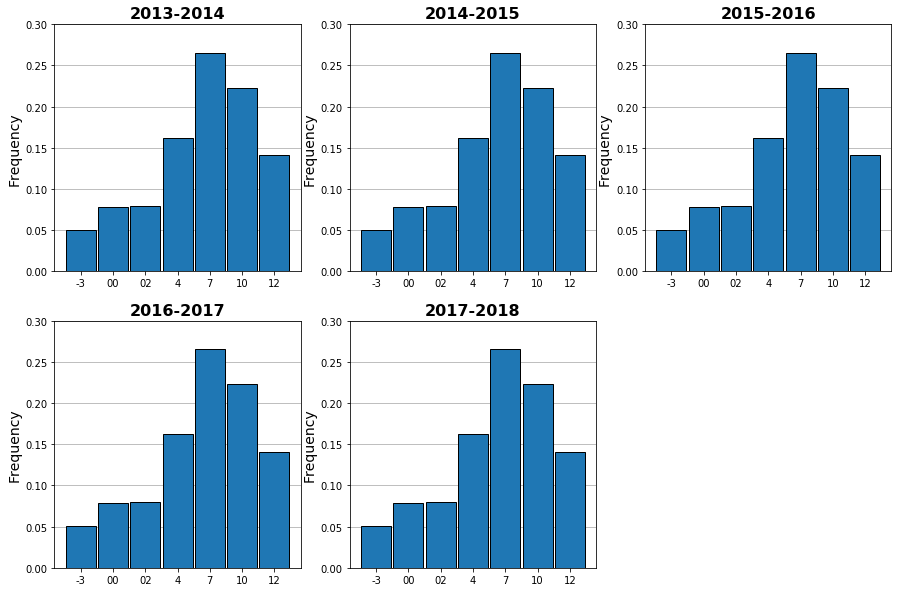

In [183]:
years = ["2013-2014","2014-2015","2015-2016","2016-2017","2017-2018"]

f, ax = plt.subplots(figsize=(15,10))

for i in range(5):
    plt.subplot(2, 3, 1+i)
    plt.title(years[i], fontsize = 16, weight = 'bold')
    plt.ylim([0,0.30])
    plt.grid(axis ='y',zorder=0)
    plt.ylabel('Frequency',fontsize=14)
    plt.bar(x, y_freq[0], width=0.93, edgecolor='black',zorder=3)

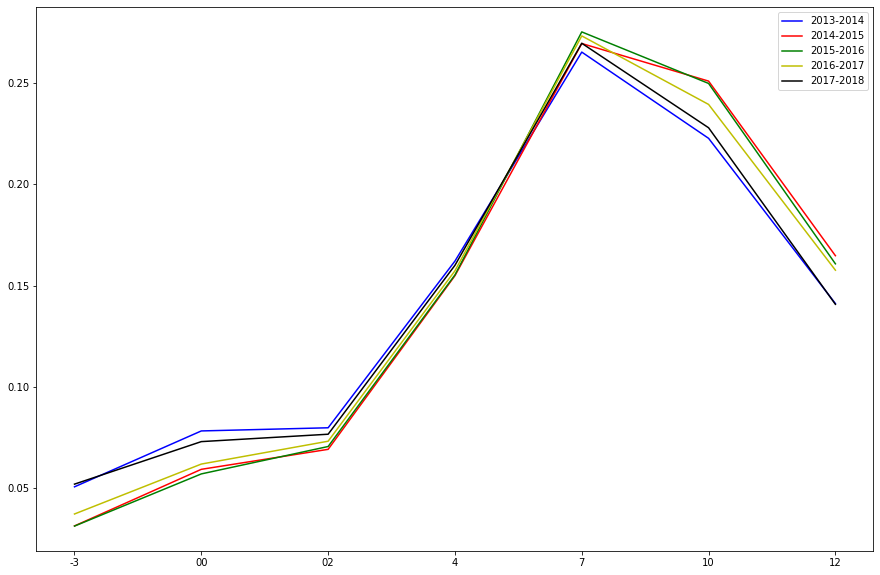

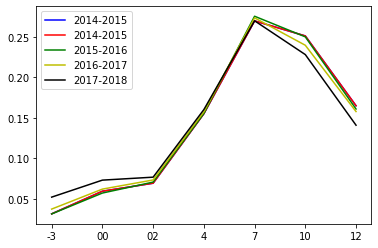

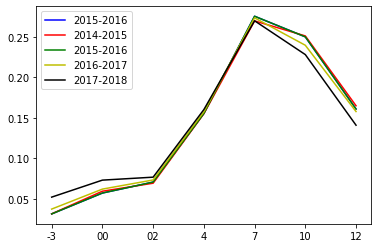

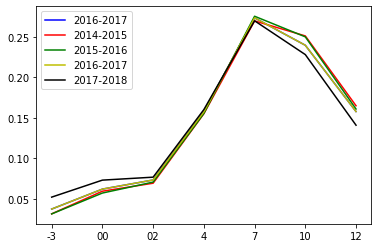

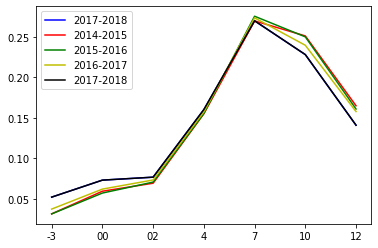

In [186]:
f, axs = plt.subplots(figsize=(15,10))

for i in range(5):
    plt.plot(x, y_freq[i],'b-', label = years[i])
    plt.plot(x, y_freq[1],'r-',label = years[1])
    plt.plot(x, y_freq[2],'g-',label = years[2])
    plt.plot(x, y_freq[3], 'y-',label = years[3])
    plt.plot(x, y_freq[4],'k-',label = years[4])
    plt.legend(loc='best')
    plt.show()